In [1]:
import pandas as pd
import numpy as np
import glob
home_dir = '/Users/zehaiwang/Downloads/2018NBA_Hackathon_Files/Business Analytics/'

In [2]:
file_list = glob.glob(home_dir+'*.csv')
print ([x.split('/')[-1].strip('.csv') for x in file_list])

['test_set', 'player_data', 'game_data', 'training_set']


In [3]:
player_data = pd.read_csv(file_list[1],parse_dates=["Game_Date"])
player_data.head()

,Season,Game_ID,Game_Date,Team,Person_ID,Name,ASG_Team,Active_Status,Minutes,Points,...,Steals,Blocks,Turnovers,Field_Goals,Field_Goals_Attempted,Three_Pointers,Three_Pointers_Attempted,Free_Throws,Free_Throws_Attempted,Personal_Fouls
0,2016-17,21600001,2016-10-25,CLE,101112,Channing Frye,None,Active,14.0,6.0,...,1.0,1.0,1.0,2.0,6.0,2.0,5.0,0.0,0.0,4.0
1,2016-17,21600001,2016-10-25,CLE,201567,Kevin Love,East ASG,Active,25.0,23.0,...,3.0,0.0,2.0,6.0,15.0,2.0,6.0,9.0,12.0,3.0
2,2016-17,21600001,2016-10-25,CLE,202681,Kyrie Irving,East ASG,Active,30.0,29.0,...,2.0,0.0,0.0,12.0,22.0,4.0,7.0,1.0,1.0,1.0
3,2016-17,21600001,2016-10-25,CLE,202684,Tristan Thompson,None,Active,22.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
4,2016-17,21600001,2016-10-25,CLE,202697,Iman Shumpert,None,Active,14.0,2.0,...,0.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,0.0,2.0


In [32]:
set(player_data.Active_Status.tolist())

{'Active', 'Inactive'}

In [37]:
set(player_data[(player_data['Active_Status']=='Inactive') & (player_data['ASG_Team']!='None')].Name.tolist())

{'Al Horford',
 'Andre Drummond',
 'Anthony Davis',
 'Carmelo Anthony',
 'Damian Lillard',
 'DeAndre Jordan',
 'DeMar DeRozan',
 'DeMarcus Cousins',
 'Draymond Green',
 'Giannis Antetokounmpo',
 'Goran Dragic',
 'Gordon Hayward',
 'Isaiah Thomas',
 'James Harden',
 'Jimmy Butler',
 'Joel Embiid',
 'John Wall',
 'Kawhi Leonard',
 'Kemba Walker',
 'Kevin Durant',
 'Kevin Love',
 'Klay Thompson',
 'Kristaps Porzingis',
 'Kyle Lowry',
 'Kyrie Irving',
 'LaMarcus Aldridge',
 'LeBron James',
 'Paul George',
 'Paul Millsap',
 'Russell Westbrook',
 'Stephen Curry',
 'Victor Oladipo'}

In [4]:
# number ASG player in the Game
player_data['ASG_status'] = (player_data['ASG_Team']!= 'None')
l = player_data.groupby('Game_ID')['ASG_status'].sum()

In [23]:
import matplotlib.pyplot as plt

In [6]:
game_data = pd.read_csv(file_list[2],parse_dates=["Game_Date"])
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 16 columns):
Season                4920 non-null object
Game_ID               4920 non-null int64
Game_Date             4920 non-null datetime64[ns]
Team                  4920 non-null object
Location              4920 non-null object
Wins_Entering_Gm      4920 non-null int64
Losses_Entering_Gm    4920 non-null int64
Team_Minutes          4000 non-null float64
Final_Score           4000 non-null float64
Lead_Changes          4000 non-null float64
Ties                  4000 non-null float64
Largest_Lead          4000 non-null float64
Full_Timeouts         4000 non-null float64
Short_Timeouts        4000 non-null float64
Qtr_4_Score           4000 non-null float64
L2M_Score             4000 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 615.1+ KB


In [63]:
game_data.head()

,Season,Game_ID,Game_Date,Team,Location,Wins_Entering_Gm,Losses_Entering_Gm,Team_Minutes,Final_Score,Lead_Changes,Ties,Largest_Lead,Full_Timeouts,Short_Timeouts,Qtr_4_Score,L2M_Score
0,2016-17,21600001,2016-10-25,CLE,H,0,0,240.0,117.0,1.0,3.0,32.0,4.0,1.0,82.0,113.0
1,2016-17,21600001,2016-10-25,NYK,A,0,0,240.0,88.0,0.0,1.0,4.0,4.0,2.0,64.0,84.0
2,2016-17,21600002,2016-10-25,POR,H,0,0,240.0,113.0,6.0,6.0,13.0,5.0,0.0,77.0,104.0
3,2016-17,21600002,2016-10-25,UTA,A,0,0,240.0,104.0,5.0,1.0,8.0,5.0,2.0,83.0,102.0
4,2016-17,21600003,2016-10-25,GSW,H,0,0,240.0,100.0,1.0,2.0,4.0,3.0,1.0,77.0,100.0


In [64]:
game_data.Wins_Entering_Gm.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])

In [65]:
game_data.Team_Minutes.unique()

array([240., 265.,  nan, 290., 315., 365.])

In [7]:
train_df = pd.read_csv(file_list[3],parse_dates=["Game_Date"])
train_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Country,Rounded Viewers
0,2016-17,21600001,2016-10-25,NYK,CLE,C113,18
1,2016-17,21600001,2016-10-25,NYK,CLE,C193,1
2,2016-17,21600001,2016-10-25,NYK,CLE,C126,4
3,2016-17,21600001,2016-10-25,NYK,CLE,C163,11
4,2016-17,21600001,2016-10-25,NYK,CLE,C73,3


In [8]:
ASG_pergame = l.to_frame().reset_index()

In [9]:
train_df = pd.merge(train_df,ASG_pergame,on='Game_ID')

In [10]:
import seaborn as sns

In [11]:
# Stat of viewing countries of each game
by_game = train_df.groupby('Game_ID')
by_game['Country'].count().describe()

count    2000.000000
mean      140.312500
std        17.953161
min        85.000000
25%       128.000000
50%       141.000000
75%       153.000000
max       193.000000
Name: Country, dtype: float64

In [12]:
view_stat = by_game['Rounded Viewers'].describe()

In [13]:
view_stat = view_stat.reset_index()


,Game_ID,count,mean,std,min,25%,50%,75%,max
0,21600001,177.0,325.937853,1063.088437,1.0,4.00,23.0,190.0,12200.0
1,21600002,169.0,241.065089,889.520337,1.0,3.00,13.0,110.0,10200.0
2,21600003,185.0,326.637838,1096.824157,1.0,4.00,19.0,173.0,12900.0
3,21600004,148.0,153.756757,482.962973,1.0,3.75,15.0,109.0,4800.0
4,21600005,162.0,209.395062,719.142367,1.0,3.00,12.0,104.5,7700.0


In [17]:
view_stat = pd.merge(view_stat, ASG_pergame, on='Game_ID')

In [14]:
by_game['Rounded Viewers'].sum().describe()

count     2000.000000
mean     16967.709500
std      10906.922749
min       1899.000000
25%       9328.500000
50%      14271.500000
75%      21841.750000
max      89246.000000
Name: Rounded Viewers, dtype: float64

In [15]:
by_game['Rounded Viewers'].sum()[by_game['Rounded Viewers'].sum()==89246.000000]

Game_ID
21700494    89246
Name: Rounded Viewers, dtype: int64

In [16]:
# Game with maximum viewing rate
game_data[game_data.Game_ID==21700494]

,Season,Game_ID,Game_Date,Team,Location,Wins_Entering_Gm,Losses_Entering_Gm,Team_Minutes,Final_Score,Lead_Changes,Ties,Largest_Lead,Full_Timeouts,Short_Timeouts,Qtr_4_Score,L2M_Score
3446,2017-18,21700494,2017-12-25,CLE,A,24,9,240.0,92.0,3.0,3.0,7.0,6.0,0.0,67.0,90.0
3447,2017-18,21700494,2017-12-25,GSW,H,26,7,240.0,99.0,4.0,6.0,9.0,6.0,0.0,71.0,92.0


In [18]:
view_stat.head()

,Game_ID,count,mean,std,min,25%,50%,75%,max,ASG_status
0,21600001,177.0,325.937853,1063.088437,1.0,4.00,23.0,190.0,12200.0,4.0
1,21600002,169.0,241.065089,889.520337,1.0,3.00,13.0,110.0,10200.0,1.0
2,21600003,185.0,326.637838,1096.824157,1.0,4.00,19.0,173.0,12900.0,5.0
3,21600004,148.0,153.756757,482.962973,1.0,3.75,15.0,109.0,4800.0,0.0
4,21600005,162.0,209.395062,719.142367,1.0,3.00,12.0,104.5,7700.0,1.0


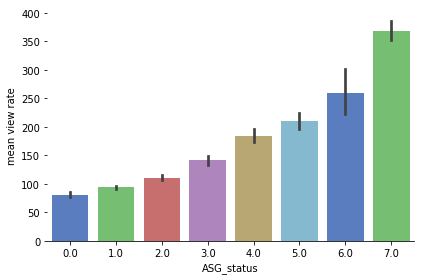

In [19]:
g = sns.factorplot(x="ASG_status",y="mean",data=view_stat,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("mean view rate")

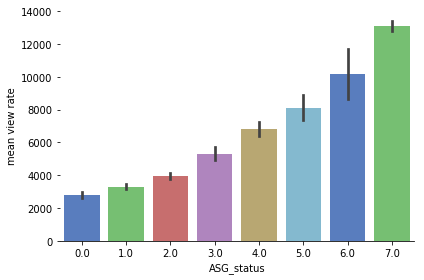

In [20]:
g = sns.factorplot(x="ASG_status",y="max",data=view_stat,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("mean view rate")

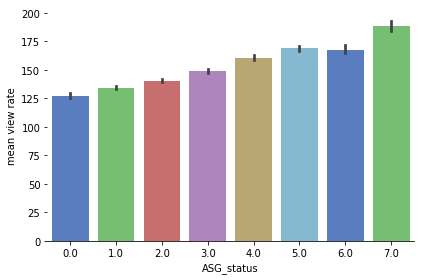

In [21]:
g = sns.factorplot(x="ASG_status",y="count",data=view_stat,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("mean view rate")

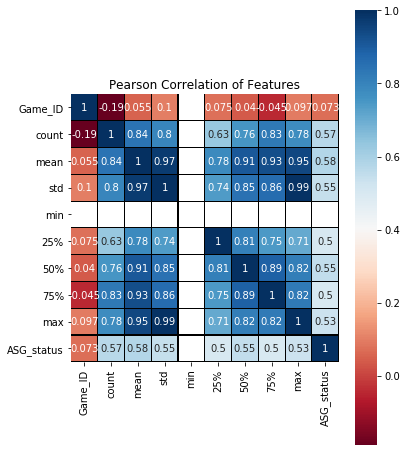

In [28]:
colormap = plt.cm.RdBu
plt.figure(figsize=(6,8))
plt.title('Pearson Correlation of Features', y=1, size=12)
sns.heatmap(view_stat.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='Black', annot=True)

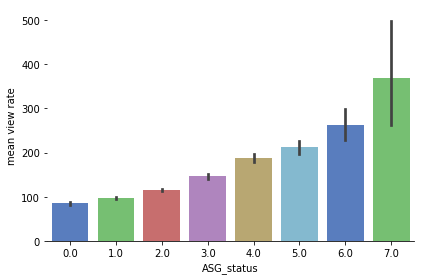

In [30]:
g = sns.factorplot(x="ASG_status",y="Rounded Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("mean view rate")

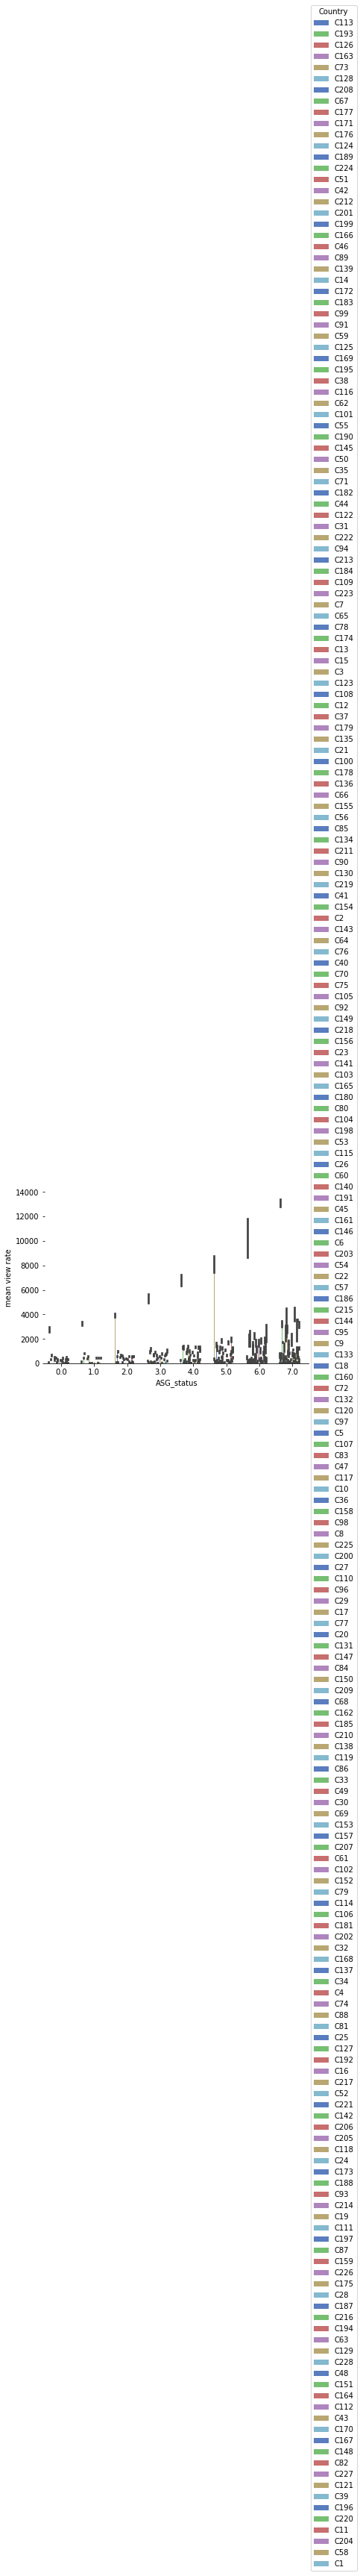

In [31]:
g = sns.factorplot(x="ASG_status",y="Rounded Viewers",hue='Country' ,data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("mean view rate")

In [38]:
train_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Country,Rounded Viewers,ASG_status
0,2016-17,21600001,2016-10-25,NYK,CLE,C113,18,4.0
1,2016-17,21600001,2016-10-25,NYK,CLE,C193,1,4.0
2,2016-17,21600001,2016-10-25,NYK,CLE,C126,4,4.0
3,2016-17,21600001,2016-10-25,NYK,CLE,C163,11,4.0
4,2016-17,21600001,2016-10-25,NYK,CLE,C73,3,4.0


In [41]:
train_df['weekday'] = train_df.Game_Date.dt.weekday

In [57]:
train_df.tail()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Country,Rounded Viewers,ASG_status,weekday,play_offs
280620,2017-18,21701221,2018-04-11,TOR,MIA,C181,602,3.0,2,False
280621,2017-18,21701221,2018-04-11,TOR,MIA,C202,53,3.0,2,False
280622,2017-18,21701221,2018-04-11,TOR,MIA,C32,10,3.0,2,False
280623,2017-18,21701221,2018-04-11,TOR,MIA,C168,20,3.0,2,False
280624,2017-18,21701221,2018-04-11,TOR,MIA,C137,3,3.0,2,False


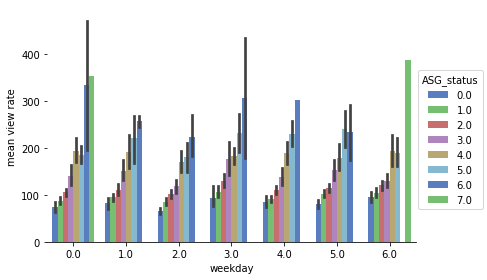

In [44]:

g = sns.factorplot(x="weekday",y="Rounded Viewers",hue='ASG_status',data=train_df.groupby('Game_ID').mean(),kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("mean view rate")

# Check if the match is in playoff season

For 16-17 season: playoffs start from 4-15-2017

For 17-18 season: playoffs start from 4-14-2018

All the data are not in playoff season

In [52]:
def if_playoff(row_data):
    if row_data['Season']=='2016-17':
        return row_data['Game_Date'] >= pd.to_datetime('2017-04-15')
    else:
        return row_data['Game_Date'] >= pd.to_datetime('2018-04-14')


In [54]:
train_df['play_offs'] = train_df.apply(if_playoff,axis=1)

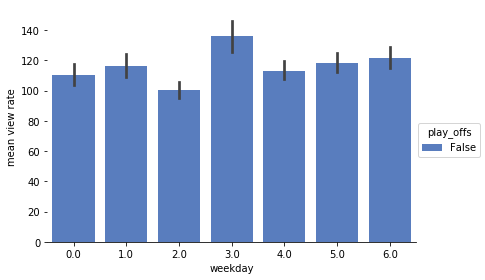

In [55]:

g = sns.factorplot(x="weekday",y="Rounded Viewers",hue='play_offs',data=train_df.groupby('Game_ID').mean(),kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("mean view rate")

In [58]:
train_df['mondth'] = train_df.Game_Date.dt.month

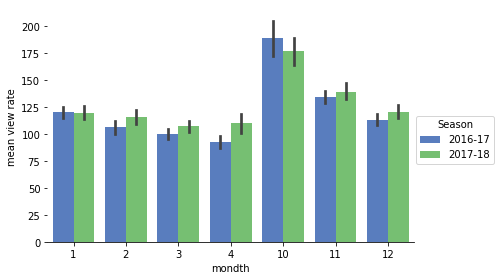

In [62]:

g = sns.factorplot(x='mondth',y="Rounded Viewers",hue='Season',data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("mean view rate")

## Month seems to have bigger effect on viewers

rounded viewers will be higher at the beginning of the season

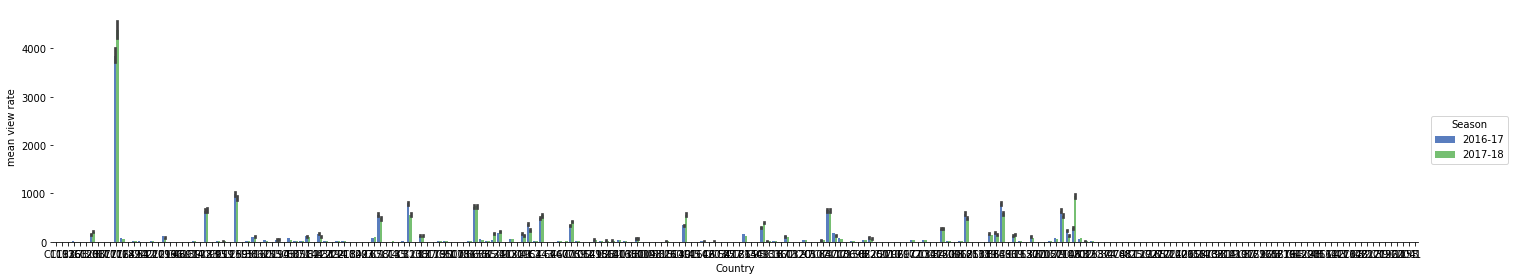

In [77]:
g = sns.factorplot(x='Country',y="Rounded Viewers",hue='Season',data=train_df,kind="bar", size = 4, aspect=5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("mean view rate")

### Most of the countries have stable viewers rate, most of them stays quite low

In [67]:
len(train_df.Country.unique())

228

In [69]:
country_wise_view = train_df.groupby('Country')['Rounded Viewers'].describe()

In [70]:
country_wise_view.reset_index()

,Country,count,mean,std,min,25%,50%,75%,max
0,C1,3.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
1,C10,2000.0,69.632500,48.018042,4.0,35.75,58.0,93.00,407.0
2,C100,1646.0,2.564399,1.750150,1.0,1.00,2.0,3.00,16.0
3,C101,1991.0,31.048217,29.390486,1.0,11.00,23.0,41.00,307.0
4,C102,1196.0,1.965719,1.299370,1.0,1.00,2.0,3.00,13.0
5,C103,2000.0,41.680500,28.761120,2.0,21.00,34.0,55.00,187.0
6,C104,1341.0,1.885906,1.278859,1.0,1.00,1.0,2.00,11.0
7,C105,1981.0,16.839980,14.117263,1.0,7.00,12.0,22.00,108.0
8,C106,2000.0,185.717000,143.243046,24.0,88.00,146.0,234.25,1320.0
9,C107,1552.0,3.388531,3.080974,1.0,1.00,2.0,4.00,33.0


In [76]:
np.sort(country_wise_view.reset_index()['min'].unique())

array([  1.,   2.,   3.,   4.,   5.,   6.,   8.,   9.,  10.,  11.,  12.,
        13.,  18.,  19.,  21.,  22.,  24.,  27.,  29.,  30.,  31.,  35.,
        36.,  37.,  40.,  43.,  44.,  53., 195.])

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


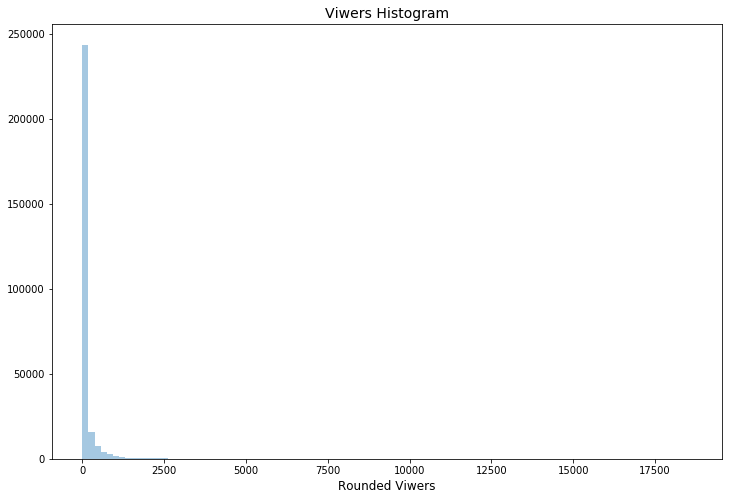

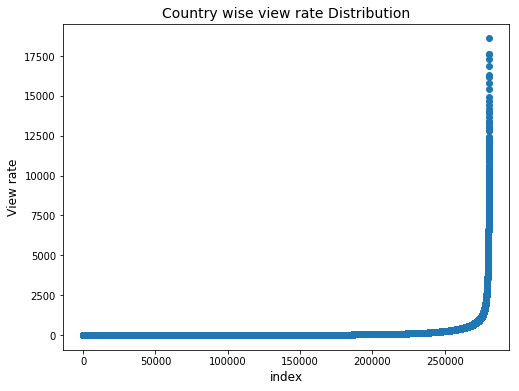

In [72]:
plt.figure(figsize=(12,8))
sns.distplot(train_df["Rounded Viewers"].values, bins=100, kde=False)
plt.xlabel('Rounded Viwers',size=12)
plt.title("Viwers Histogram", fontsize=14)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df['Rounded Viewers'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('View rate', fontsize=12)
plt.title("Country wise view rate Distribution", fontsize=14)
plt.show()

In [81]:
test_df = pd.read_csv(file_list[0],parse_dates=["Game_Date"])
test_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers
0,2016-17,21600010,2016-10-26,DEN,NOP,NaN
1,2016-17,21600023,2016-10-28,HOU,DAL,NaN
2,2016-17,21600027,2016-10-29,BOS,CHA,NaN
3,2016-17,21600026,2016-10-29,ATL,PHI,NaN
4,2016-17,21600048,2016-11-01,LAL,IND,NaN


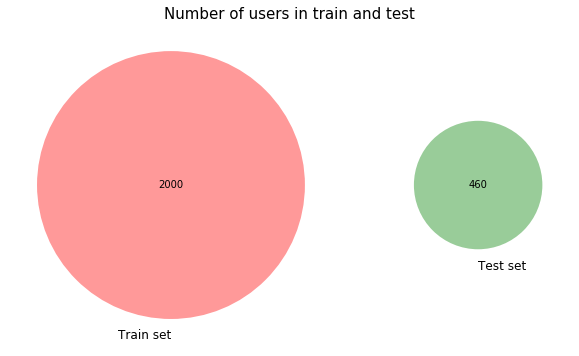

In [82]:
from matplotlib_venn import venn3

plt.figure(figsize=(10,7))
venn3([set(train_df.Game_ID.unique()), set(test_df.Game_ID.unique()),set(game_data.Game_ID.unique())], set_labels = ('Train set', 'Test set','Game_info') )
plt.title("Number of Games info included in Game data", fontsize=12)
plt.show()

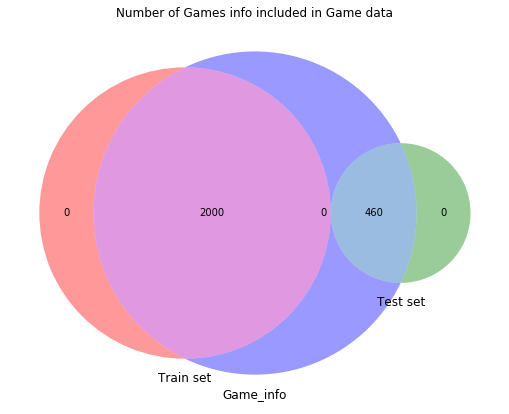